In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# Silnik ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import cross_validate
import xgboost as xgb
from hyperopt import hp
from hyperopt import fmin, tpe
from hyperopt.pyll.base import scope

In [4]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [42]:
from sklearn.feature_selection import RFE

In [5]:
data = pd.read_csv('training_sample.csv')

In [6]:
data.shape

(455401, 25)

In [7]:
data_to_join = pd.read_csv('testing_sample.csv')

In [8]:
data_to_join.shape

(151655, 25)

In [9]:
data = pd.concat([data, data_to_join], ignore_index=True)

In [10]:
data.shape

(607056, 25)

In [11]:
data.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

In [12]:
data.drop(columns=['UserID', 'sign_in', 'saw_checkout', 'checked_delivery_detail'], inplace = True)

In [13]:
data

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
607052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
607053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
607054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [14]:
X = data.iloc[:,:-1]

In [15]:
y = data.iloc[:,-1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [18]:
X_train.shape

(388515, 20)

In [19]:
X_test.shape

(121412, 20)

In [20]:
data_dm = xgb.DMatrix(data=X_train.values, label=y_train.values)

<AxesSubplot:>

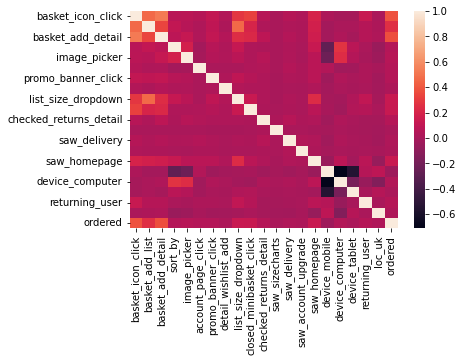

In [21]:
sns.heatmap(data.corr())

In [22]:
# Sprawdzanie niezbilansowania bazy
round((data[data == 1].count()/len(data))*100,2)

basket_icon_click           9.29
basket_add_list             7.11
basket_add_detail          10.61
sort_by                     3.67
image_picker                2.64
account_page_click          0.35
promo_banner_click          1.57
detail_wishlist_add         0.34
list_size_dropdown         22.68
closed_minibasket_click     1.63
checked_returns_detail      0.91
saw_sizecharts              0.04
saw_delivery                0.54
saw_account_upgrade         0.11
saw_homepage               28.89
device_mobile              68.09
device_computer            19.58
device_tablet              12.63
returning_user             53.35
loc_uk                     93.20
ordered                     3.15
dtype: float64

In [23]:
positive_ordered = data[data['ordered']==1]

In [24]:
# Sprawdzanie niezbilansowania bazy
round((positive_ordered[positive_ordered == 0].count()/len(positive_ordered))*100,2)

basket_icon_click          28.89
basket_add_list            56.43
basket_add_detail          26.01
sort_by                    91.39
image_picker               91.81
account_page_click         98.01
promo_banner_click         94.97
detail_wishlist_add        98.98
list_size_dropdown         45.79
closed_minibasket_click    89.55
checked_returns_detail     96.37
saw_sizecharts             99.89
saw_delivery               98.33
saw_account_upgrade        99.48
saw_homepage               36.77
device_mobile              41.49
device_computer            71.27
device_tablet              84.46
returning_user             32.13
loc_uk                      2.90
ordered                     0.00
dtype: float64

In [25]:
# Oblicznie stosunku 0 do 1 - argument do xgb classifier żeby zrównoważyć dane

neg_samples = np.sum(y == 0)
pos_samples = np.sum(y == 1)
scale_pos_weight = neg_samples / pos_samples

In [26]:
# Modele na początek
lr = LogisticRegression(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')
rf = RandomForestClassifier(class_weight='balanced')
nb = GaussianNB() 
xgb_cl = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)

In [27]:
# Lista modeli
models = [lr, dt, rf, nb, xgb_cl]

In [28]:
# Metryki
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']

Dla LogisticRegression: Accuracy: 0.899 | F1 Score: 0.651 | AUC Score: 0.946 | Precision: 0.61 | Recall: 0.895


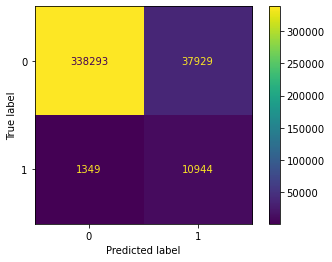

Dla DecisionTreeClassifier: Accuracy: 0.883 | F1 Score: 0.631 | AUC Score: 0.903 | Precision: 0.598 | Recall: 0.889


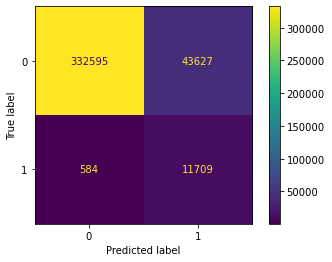

Dla RandomForestClassifier: Accuracy: 0.885 | F1 Score: 0.634 | AUC Score: 0.93 | Precision: 0.599 | Recall: 0.888


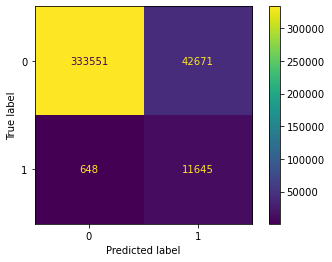

Dla GaussianNB: Accuracy: 0.903 | F1 Score: 0.612 | AUC Score: 0.903 | Precision: 0.583 | Recall: 0.75


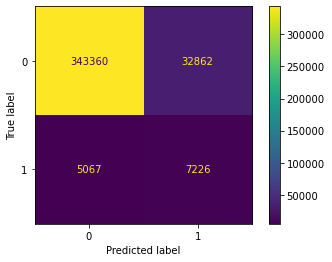

Dla XGBClassifier: Accuracy: 0.879 | F1 Score: 0.631 | AUC Score: 0.948 | Precision: 0.598 | Recall: 0.905


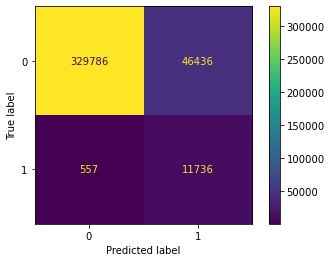

In [29]:
results = []

for model in models:
    # Trenowanie
    model.fit(X_train, y_train) 
    
    # Crossvalidation
    scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
    
    # Wyciąganie metryk
    accuracy = round(np.mean(scores['test_accuracy']),3)
    f1 = round(np.mean(scores['test_f1_macro']),3)
    AUC = round(np.mean(scores['test_roc_auc']),3)
    precision = round(np.mean(scores['test_precision_macro']),3)
    recall = round(np.mean(scores['test_recall_macro']),3)
    
    # Macierz pomyłek
    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    
    # Metryki do listy pod df
    results.append({
        'model': model.__class__.__name__,
        'auc': AUC,
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    })
    
    # Wydruk
    print('Dla {}: Accuracy: {} | F1 Score: {} | AUC Score: {} | Precision: {} | Recall: {}'.format(type(model).__name__, accuracy, f1, AUC, precision, recall))
    
    # Macierz pomyłek graficznie
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()  

In [31]:
# Porównanie metryk powyższych modeli w df
results_df = pd.DataFrame.from_records(results) 
results_df

,model,auc,accuracy,f1,precision,recall
0,LogisticRegression,0.946,0.899,0.651,0.610,0.895
1,DecisionTreeClassifier,0.903,0.883,0.631,0.598,0.889
2,RandomForestClassifier,0.930,0.885,0.634,0.599,0.888
3,GaussianNB,0.903,0.903,0.612,0.583,0.750
4,XGBClassifier,0.948,0.879,0.631,0.598,0.905


Krzywa ROC dla LogisticRegression


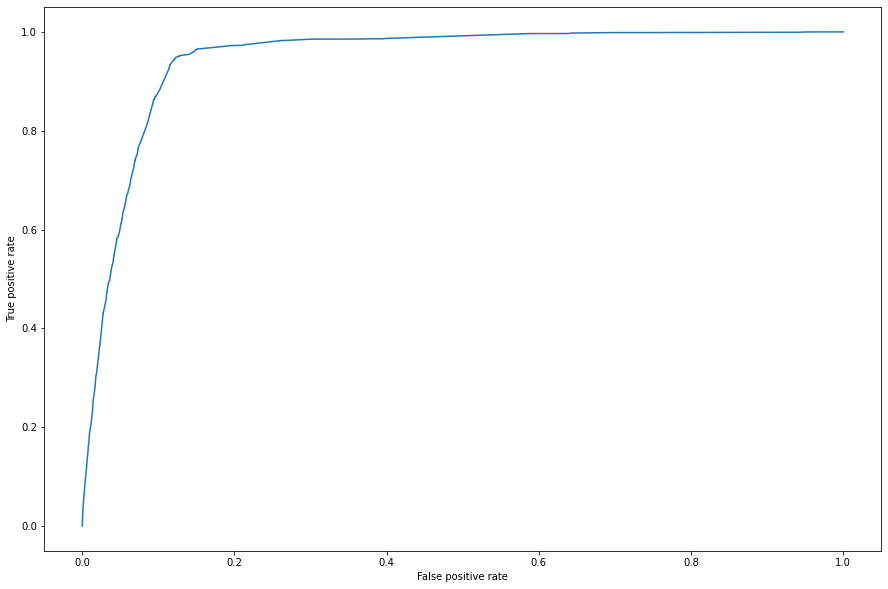

Krzywa ROC dla DecisionTreeClassifier


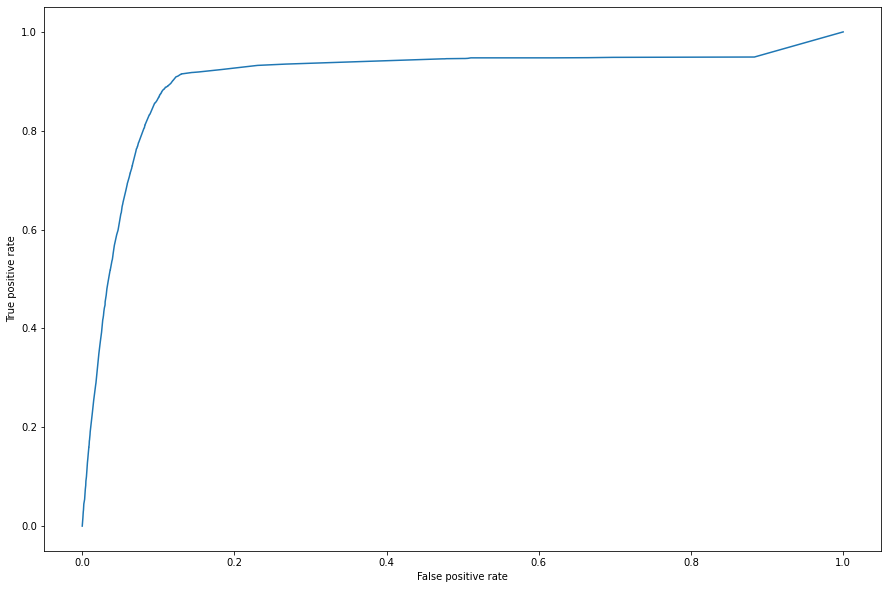

Krzywa ROC dla RandomForestClassifier


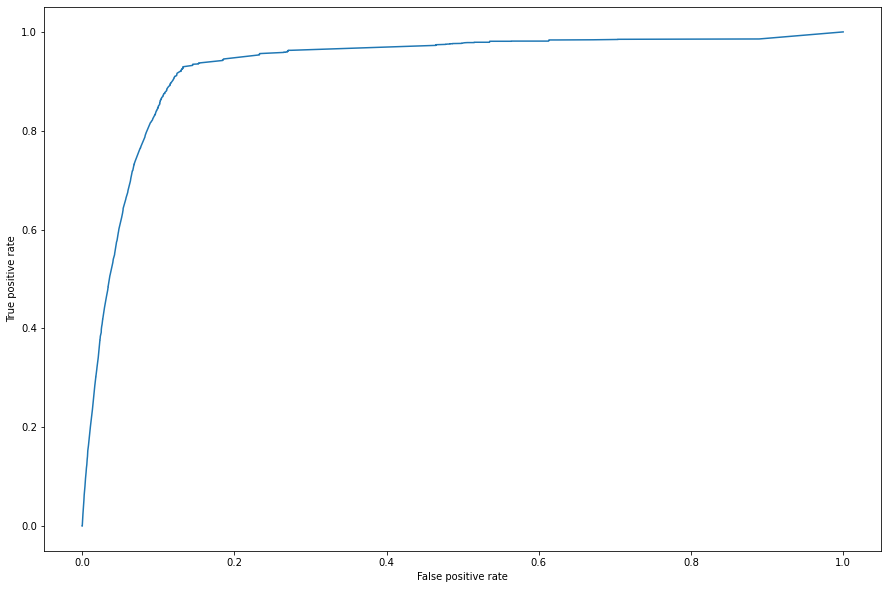

Krzywa ROC dla GaussianNB


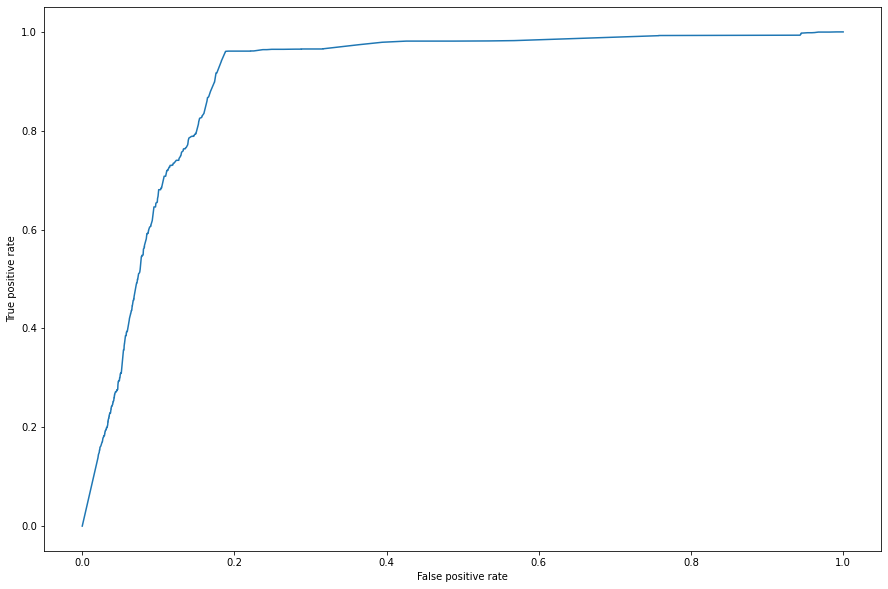

Krzywa ROC dla XGBClassifier


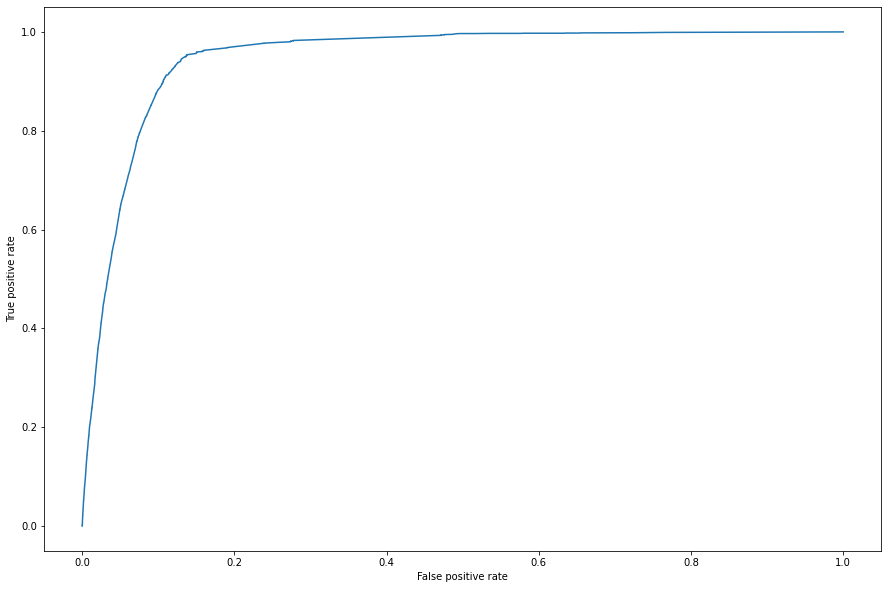

In [32]:
# Krzywe ROC (czy dobre dane czy powinny być testowe?)
for model in models:
    probas = model.predict_proba(X_valid)
    positive_proba = probas[:, 1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_valid, positive_proba)
    print('Krzywa ROC dla {}'.format(type(model).__name__))
    plt.figure(figsize=(15, 10))
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.show()
 

In [33]:
results2 = []
for model in models:   
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_valid)[:, 1]
    for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        y_pred_labels = np.where(y_pred > i, 1, 0)
        results2.append({
            "model": model.__class__.__name__,
            "threshold": i,
            "auc": round(roc_auc_score(y_valid, y_pred_labels),2),
            "accuracy": round(accuracy_score(y_valid, y_pred_labels),2),
            "f1": round(f1_score(y_valid, y_pred_labels),2),
            "recall": round(recall_score(y_valid, y_pred_labels),2),
            "precision": round(precision_score(y_valid, y_pred_labels),2)
            })


In [34]:
results_df2 = pd.DataFrame.from_records(results2)

In [35]:
results_df2.sort_values(by='precision', ascending=False)

,model,threshold,auc,accuracy,f1,recall,precision
44,XGBClassifier,0.9,0.75,0.95,0.40,0.54,0.31
17,DecisionTreeClassifier,0.9,0.75,0.95,0.39,0.53,0.31
26,RandomForestClassifier,0.9,0.72,0.95,0.38,0.48,0.31
8,LogisticRegression,0.9,0.77,0.94,0.39,0.58,0.29
7,LogisticRegression,0.8,0.81,0.93,0.38,0.69,0.26
6,LogisticRegression,0.7,0.84,0.92,0.38,0.75,0.25
43,XGBClassifier,0.8,0.86,0.92,0.38,0.80,0.25
25,RandomForestClassifier,0.8,0.83,0.92,0.38,0.74,0.25
16,DecisionTreeClassifier,0.8,0.85,0.92,0.38,0.78,0.25
5,LogisticRegression,0.6,0.88,0.91,0.36,0.86,0.23


In [36]:
feature_names = data.columns[:-1]
feature_names

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_returns_detail', 'saw_sizecharts', 'saw_delivery',
       'saw_account_upgrade', 'saw_homepage', 'device_mobile',
       'device_computer', 'device_tablet', 'returning_user', 'loc_uk'],
      dtype='object')

In [37]:
def fimport(model):
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_valid)
    importances = model.feature_importances_
    feature_importances = pd.Series(importances, index=feature_names)
    print(model.__class__.__name__)
    return feature_importances.nlargest(20).plot(kind='barh')

In [56]:
feature_models = [dt, rf, xgb_cl]

DecisionTreeClassifier


<AxesSubplot:>

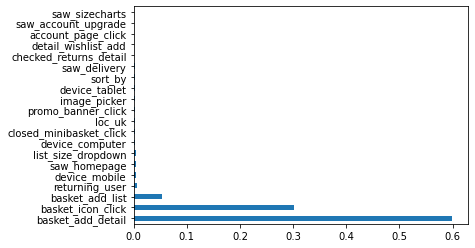

In [39]:
fimport(dt)

RandomForestClassifier


<AxesSubplot:>

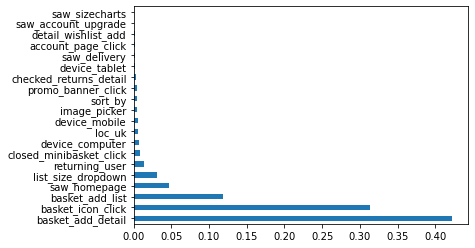

In [40]:
fimport(rf)

XGBClassifier


<AxesSubplot:>

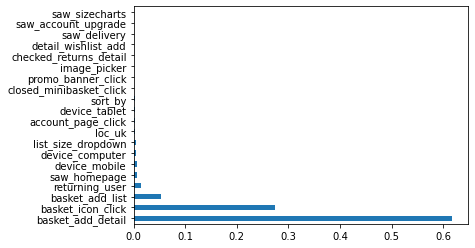

In [41]:
fimport(xgb_cl)

In [50]:
selector = RFE(dt, n_features_to_select=8, step=1)
selector.fit(X_train, y_train)
selector.support_

array([ True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True,  True, False,
        True, False])

In [52]:
data.drop(columns=['ordered']).columns[selector.support_]

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'list_size_dropdown', 'saw_homepage', 'device_mobile',
       'device_computer', 'returning_user'],
      dtype='object')

In [57]:
for model in feature_models:
    selector = RFE(model, n_features_to_select=8, step=1)
    selector.fit(X_train, y_train)
    print(model.__class__.__name__)
    print(data.drop(columns=['ordered']).columns[selector.support_])

DecisionTreeClassifier
Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'list_size_dropdown', 'saw_homepage', 'device_mobile',
       'device_computer', 'returning_user'],
      dtype='object')
RandomForestClassifier
Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'list_size_dropdown', 'closed_minibasket_click', 'saw_homepage',
       'device_computer', 'returning_user'],
      dtype='object')
XGBClassifier
Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'list_size_dropdown', 'saw_homepage', 'device_mobile',
       'device_computer', 'returning_user'],
      dtype='object')


In [111]:
selected_features = ['basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'list_size_dropdown', 'saw_homepage', 'device_mobile', 'returning_user']